In [5]:
!apt-get install unrar


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


In [6]:
!unrar x /content/Dataset.rar /content/Dataset



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Dataset.rar

Unexpected end of archive
No files to extract


In [7]:
!mkdir -p /content/Dataset


In [8]:
!unrar x -o+ /content/Dataset.rar /content/Dataset/



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Dataset.rar

Creating    /content/Dataset/Dataset                                  OK
Creating    /content/Dataset/Dataset/Testing                          OK
Creating    /content/Dataset/Dataset/Testing/fire                     OK
Extracting  /content/Dataset/Dataset/Testing/fire/abc001.jpg               0%  OK 
Extracting  /content/Dataset/Dataset/Testing/fire/abc002.jpg               0%  OK 
Extracting  /content/Dataset/Dataset/Testing/fire/abc003.jpg               0%  OK 
Extracting  /content/Dataset/Dataset/Testing/fire/abc004.jpg               0%  OK 
Extracting  /content/Dataset/Dataset/Testing/fire/abc005.jpg               0%  OK 
Extracting  /content/Dataset/Dataset/Testing/fire/abc006.jpg               0%  OK 
Extracting  /content/Dataset/Dataset/Testing/fire/abc007.jpg               0%  OK 
Extracting  /content/Da

In [9]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import roc_curve, auc, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (150, 150)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    "/content/Dataset/Dataset/Training and Validation",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary"
)

test_generator = test_datagen.flow_from_directory(
    "/content/Dataset/Dataset/Testing",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)


Found 1320 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [11]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

# Freeze VGG layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

vgg_model = Model(inputs=base_model.input, outputs=output)

vgg_model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

vgg_model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [12]:
history_vgg = vgg_model.fit(
    train_generator,
    validation_data=test_generator,  # ✅ FIX HERE
    epochs=25
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 28s 455ms/step - accuracy: 0.7565 - loss: 0.4906 - val_accuracy: 0.9158 - val_loss: 0.2449
Epoch 2/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 237ms/step - accuracy: 0.9301 - loss: 0.1953 - val_accuracy: 0.9211 - val_loss: 0.2086
Epoch 3/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 273ms/step - accuracy: 0.9447 - loss: 0.1559 - val_accuracy: 0.9342 - val_loss: 0.1901
Epoch 4/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.9503 - loss: 0.1327 - val_accuracy: 0.9368 - val_loss: 0.1822
Epoch 5/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.9560 - loss: 0.1089 - val_accuracy: 0.9368 - val_loss: 0.1815
Epoch 6/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 223ms/step - accuracy: 0.9741 - loss: 0.0855 - val_accuracy: 0.9368 - val_loss: 0.1798
Epoch 7/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 234ms/step - accuracy: 0.9785 - loss: 0.0867 - val_accuracy: 0.9395 - val_loss: 0.1690
Epoch 8/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.9681 - loss: 0.0873 - val_accur

In [13]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# IMPORTANT: disable shuffle
test_generator.reset()
test_generator.shuffle = False

# True labels
y_true = test_generator.classes

# Model predictions
y_probs = vgg_model.predict(test_generator)
y_pred = (y_probs > 0.5).astype(int).flatten()

# Metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Optional detailed output
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred))


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step
Precision: 0.9238578680203046
Recall: 0.9578947368421052
F1 Score: 0.9405684754521964

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       190
           1       0.92      0.96      0.94       190

    accuracy                           0.94       380
   macro avg       0.94      0.94      0.94       380
weighted avg       0.94      0.94      0.94       380



12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


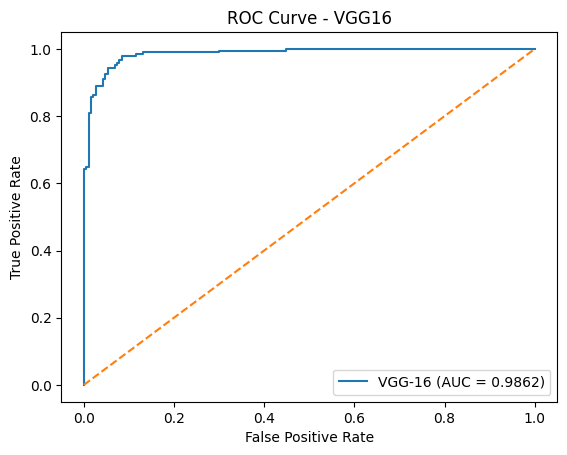

In [14]:
from sklearn.metrics import roc_curve, auc

# Ground truth labels
y_true = test_generator.classes

# Predicted probabilities
y_pred_prob = vgg_model.predict(test_generator)
y_pred_prob = y_pred_prob.ravel()

# ROC curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, label='VGG-16 (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - VGG16')
plt.legend(loc='lower right')
plt.show()


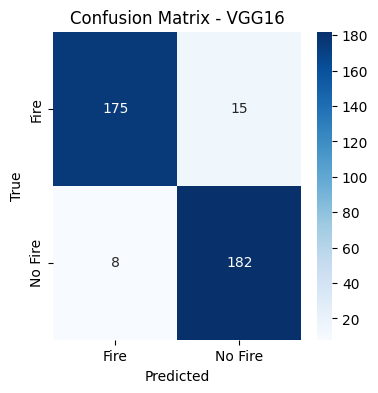

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Fire','No Fire'],
            yticklabels=['Fire','No Fire'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - VGG16")
plt.show()


In [16]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, 0]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap.numpy()


In [28]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_path = '/content/Dataset/Dataset/Testing/fire/abc015.jpg'

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0


In [29]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_channel = predictions[:, 0]  # binary output

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0)
    heatmap /= tf.reduce_max(heatmap) + 1e-8

    return heatmap.numpy()


In [30]:
heatmap = make_gradcam_heatmap(img_array, vgg_model, 'block5_conv3')

# Load original image
orig_img = cv2.imread(img_path)
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
orig_img = cv2.resize(orig_img, (150, 150))

# Resize heatmap to image size
heatmap = cv2.resize(heatmap, (150, 150))
heatmap = np.uint8(255 * heatmap)

# Apply colormap
heatmap_color = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Overlay
superimposed_img = cv2.addWeighted(orig_img, 0.6, heatmap_color, 0.4, 0)


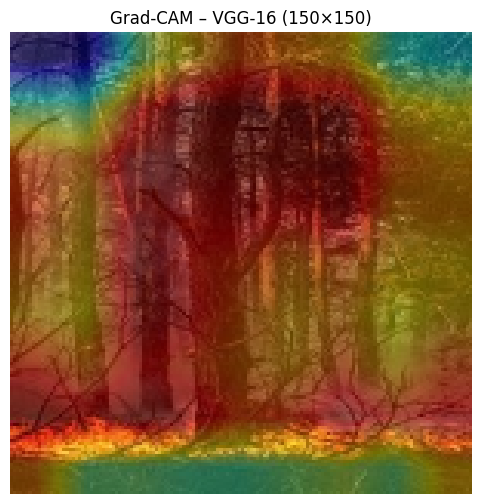

In [31]:
plt.figure(figsize=(6,6))
plt.imshow(superimposed_img)
plt.title("Grad-CAM – VGG-16 (150×150)")
plt.axis('off')
plt.show()
